In [47]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def property(T):
        Tf = (T+300)/2
        density = 1.1614 + (Tf-300)/(350-300)*(0.995-1.1614)
        viscosity = (184.6 + (Tf-300)/(350-300)*(208.2-184.6))*10**-7
        conductivity = (26.3 + (Tf-300)/(350-300)*(30.0-26.3))*10**-3
        Pr = (0.707 + (Tf-300)/(350-300)*(0.70-0.707))
        return(density,viscosity,conductivity,Pr)

def Nu_cal(Re_num, Pr):

    if (Re_num<5*10**5):
        return 0.664*Re_num**0.5*Pr*0.33
    else:
        return (0.037*Re_num**0.8*-871)*Pr*0.33

I, k,Pr,s,l,Ts, Too = sp.symbols("I, k,Pr,s,l,T_s, T_oo")
Re, rho,t, mu, v, Nu = sp.symbols("Re, rho,t, mu, v, Nu")
dI, dv = sp.symbols("dI, dv")
Q1, Q2 = sp.symbols("Q_1, Q_2")
Err = sp.Symbol("Err")
w = sp.Symbol('w')

eq_Re = sp.Eq(Re,rho*v*w/mu)
eq_Q1 = sp.Eq(Q1, I**2*s*l/w/t)
eq_Q2 = sp.Eq(Q2, k/w*Nu *2*w*l*(Ts-Too))

l_num = 0.01
s_num = 10.6 * 10**-8
Too_num = 300

eq_Q1

Eq(Q_1, I**2*l*s/(t*w))

In [48]:
v_max = 50
I_max = 0.2
w_max = 2

In [49]:
temp_acc = 0.1
w_acc = 0.1

values_1 = {v:v_max, I:I_max, l:l_num,s:s_num, Too:Too_num}

Error = 10**10
W = 0
temperature = 0

T_step = int((327-312)/temp_acc)
w_step = int(2/w_acc)


for temp in np.linspace(313,327,T_step):
    prop = property(temp)
    values_2 = {k:prop[2], mu:prop[1], rho: prop[0], Pr:prop[3]}
    for width in np.linspace(0.1,2,w_step):
        wid = width * 10**-3
        thickness = wid/1000
        Re_num = prop[0]*v_max*wid/prop[1]
        Nu_num = Nu_cal(Re_num,prop[3])
        print(Nu_num)
        
        values_3 = {Nu:Nu_num, Re:Re_num, Ts:temp, t:thickness, w:wid}
        eq_Err = eq_Q1.rhs - eq_Q2.rhs
        Error_temp = abs(eq_Err.subs(values_1).subs(values_2).subs(values_3))
        print(Error_temp)
        if Error_temp< Error:
            W = width
            temperature = temp
            Error = Error_temp

print("width = ", end="")
print(W) 
print("Temperature = ", end="")
print(temperature)
print("Error = ", end="")
print(Error)


2.696126091117112
4.22122671225999
3.8128980839257793
1.03345056186774
4.669827373426915
0.438594822920297
5.392252182234224
0.227453424519972
6.0287212156486545
0.127621652452166
6.604133205441471
0.0717928020202965
7.133279140368549
0.0368611615937634
7.625796167851558
0.0131511237354796
8.088378273351337
0.00397418420769621
8.52589930693674
0.0169663484281588
8.942038631723014
0.0272226292009558
9.33965474685383
0.0355881319371837
9.721020866639044
0.0425992941592100
10.087980104502295
0.0486105576852314
10.442051450171874
0.0538641863261893
10.784504364468448
0.0585306509600556
11.11641265365952
0.0627329680153740
11.438694251777337
0.0665618946436941
11.752141170222826
0.0700857117421612
12.057442431297309
0.0733566950956689
2.6957567920932064
4.22109116085100
3.812375816237601
1.03325886322675
4.6691877287543235
0.438360040992886
5.391513584186413
0.227182321701989
6.027895437927177
0.127318550287215
6.603228611270393
0.0714607702343522
7.132302066991875
0.0365025262757076
7.6247

In [52]:
equation = sp.Eq(eq_Q1.rhs,eq_Q2.rhs)

prop = property(temperature)

values_1 = {l:l_num,s:s_num, Too:Too_num, k:prop[2],w:W*10**-3, t:W*10**-6, Ts:temperature}
eq_1 = equation.subs(values_1)

x = [i for i in range(1,51)]
y = []
print(x)

for v in x:
    Re_num = prop[0]*v*W*10**-3/prop[1]
    Nu_num = Nu_cal(Re_num, prop[3])
    values_2 = {Nu:Nu_num}
    i = sp.solve(eq_1.subs(values_2),I)
    y.append(i[1])

print(y)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
[0.0752304937497532, 0.0894646384323744, 0.0990088978056353, 0.106391984564926, 0.112495827139364, 0.117742085719039, 0.122368157858300, 0.126522105023869, 0.130303037453066, 0.133780838042248, 0.137006787576255, 0.140019726072341, 0.142849837357094, 0.145521083974867, 0.148052834663713, 0.150460987499506, 0.152758766377886, 0.154957299245651, 0.157066046549187, 0.159093124450868, 0.161045552570177, 0.162929446589349, 0.164750169915519, 0.166512454485960, 0.168220498005321, 0.169878042962038, 0.171488441400755, 0.173054708445820, 0.174579566857588, 0.176065484378409, 0.177514705234379, 0.178929276864749, 0.180311072727212, 0.181661811855621, 0.182983075713695, 0.184276322784535, 0.185542901254036, 0.186784060081642, 0.188000958700162, 0.189194675544986, 0.190366215579459, 0.191516516956000, 0.1926

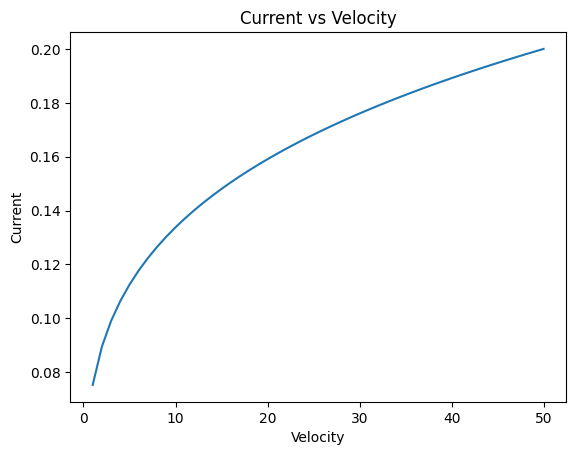

In [53]:
plt.plot(x, y)
plt.title('Current vs Velocity')
plt.xlabel('Velocity')
plt.ylabel('Current')
plt.show()